<a href="https://colab.research.google.com/github/dasbidyendu/ShortCircuitMLTask/blob/main/Task2SC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import tensorflow as tf
from tensorflow.keras import datasets,layers, models
import matplotlib.pyplot as plt
import numpy as np

In [22]:
(X_train,Y_train),(X_test,Y_test)=datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [23]:
Y_train = Y_train.reshape(-1,)
print(Y_train)

[6 9 9 ... 9 1 1]


In [24]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


In [25]:
def plot_image(X,Y,index):
  plt.imshow(X[index])
  plt.xlabel(classes[Y[index]])

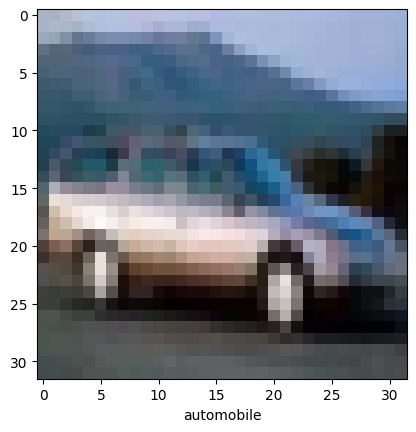

In [26]:
plot_image(X_train,Y_train,4)

In [27]:
X_train = X_train/255
X_test = X_test/255



In [28]:
cnn = models.Sequential([
  #convolution part / feature selection
  layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
  layers.MaxPooling2D((2,2)),
  #ann part/dense network
  layers.Flatten(),
  layers.Dense(128,activation='relu'),
  layers.Dense(64,activation='relu'),
  layers.Dense(32,activation='relu'),
  layers.Dense(10,activation='softmax')

])

In [31]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [32]:
cnn.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 45ms/step - accuracy: 0.3039 - loss: 1.8373
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.5392 - loss: 1.2796
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.6049 - loss: 1.1134
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 45ms/step - accuracy: 0.6365 - loss: 1.0197
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 44ms/step - accuracy: 0.6700 - loss: 0.9412
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.6872 - loss: 0.8802
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.7057 - loss: 0.8377
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - accuracy: 0.7240 - loss: 0.7860
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.7316 - loss: 0.7658
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7456 - loss: 0.7269


In [34]:
cnn.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.6926 - loss: 0.9073


[0.9105928540229797, 0.6913999915122986]

In [35]:
Y_test = Y_test.reshape(-1,)



In [36]:
Y_pred = cnn.predict(X_test)

Y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


array([[6.35690894e-03, 2.64223851e-03, 4.47179331e-03, 6.64265335e-01,
        2.40146345e-03, 1.04560338e-01, 1.45497434e-02, 2.70484970e-03,
        1.97232634e-01, 8.14671977e-04],
       [2.03082319e-02, 6.82328492e-02, 1.30175176e-05, 3.06877087e-06,
        1.68190795e-07, 8.19443997e-08, 3.93414712e-06, 1.13027731e-07,
        9.09414768e-01, 2.02371413e-03],
       [2.37391740e-02, 8.76504648e-03, 4.45540267e-04, 2.82175461e-04,
        1.04766994e-04, 3.53053692e-05, 5.02431649e-05, 4.86550125e-05,
        9.63699222e-01, 2.82980851e-03],
       [7.75302768e-01, 4.91330902e-05, 2.66449973e-02, 1.73187465e-04,
        1.60069077e-03, 2.39039618e-05, 3.39287872e-05, 1.65732708e-05,
        1.95991904e-01, 1.62908982e-04],
       [2.05181350e-05, 3.14162426e-05, 2.03547552e-02, 6.94465935e-02,
        6.82859942e-02, 1.14861282e-03, 8.40554714e-01, 1.04468534e-04,
        4.95085624e-05, 3.31736987e-06]], dtype=float32)

In [37]:
y_classes = [np.argmax(element) for element in Y_pred]
y_classes[:5]


[3, 8, 8, 0, 6]

In [38]:
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

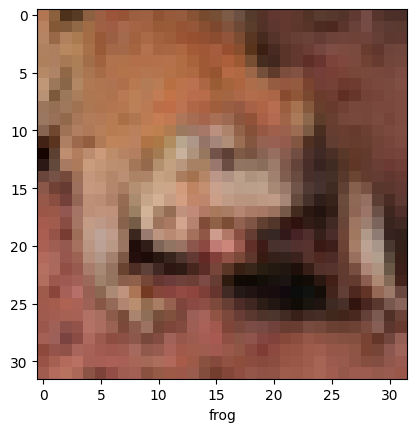

In [39]:
plot_image(X_test,Y_test,5)

In [40]:
classes[y_classes[5]]

'frog'

Confusion Matrix: 
 [[692  18  73  19   8   6   6  15 133  30]
 [ 22 822  14  14   1   8  11   6  61  41]
 [ 61   2 678  56  44  50  45  44  18   2]
 [ 21   4 139 541  32 150  39  47  20   7]
 [ 27   1 145  78 513  49  37 130  20   0]
 [  8   2 109 176  22 601  10  63   9   0]
 [  1   2  99 102  18  26 729  11  11   1]
 [ 17   0  60  50  17  59   5 778   6   8]
 [ 42  18  19  12   5   3   2   9 878  12]
 [ 32 129  23  32   3  15   8  17  59 682]]


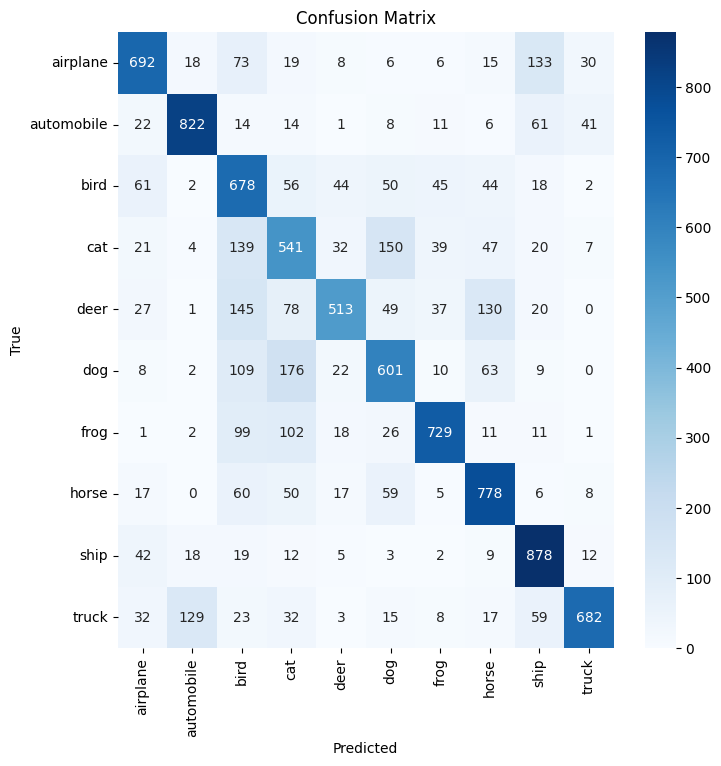

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

cm = confusion_matrix(Y_test, y_classes)
print("Confusion Matrix: \n", cm)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



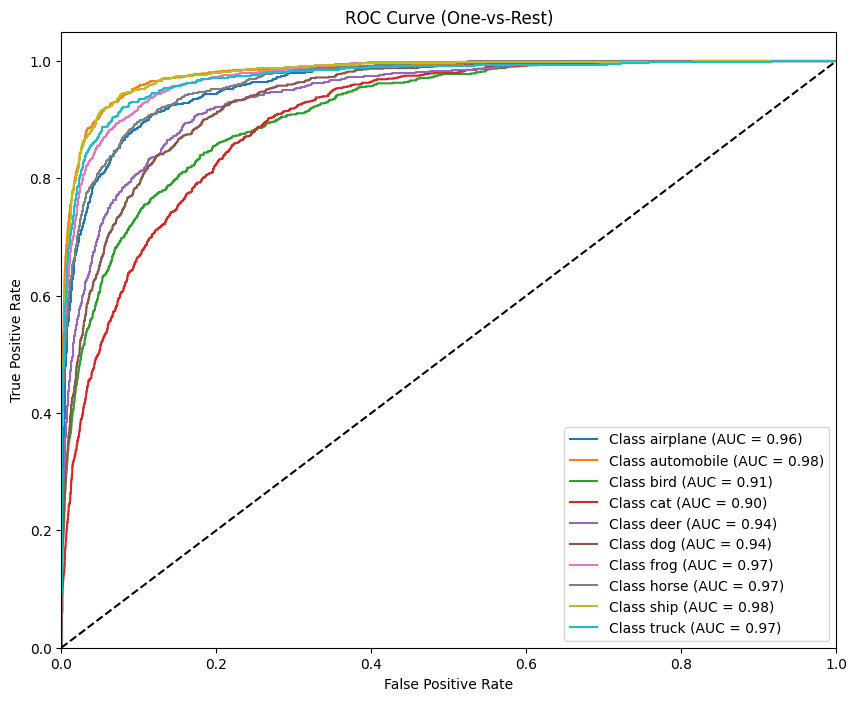

In [45]:
# 2. ROC Curve and AUC (One-vs-Rest for Multi-Class)
plt.figure(figsize=(10, 8))
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(classes)

Y_test_one_hot = tf.keras.utils.to_categorical(Y_test, num_classes=n_classes)

for i in range(n_classes):
    y_test_binary = Y_test_one_hot[:, i]
    y_score = Y_pred[:, i]
    fpr[i], tpr[i], _ = roc_curve(y_test_binary, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()
